# Combine multiple subsequent Runs NetCDF into One with all outputsteps
* [Reading multi-file datasets](https://xarray.pydata.org/en/stable/combining.html#combining-multi)
* [Parallel computing with Dask](https://xarray.pydata.org/en/stable/dask.html)
* [xarray Concatenate](https://xarray.pydata.org/en/stable/combining.html#concatenate)

## Todo
* Apply ufunc?

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datashader as ds
from JulesD3D.cleanNetCDF import fixMeshGrid, makeVelocity, addDepth, addUnderlayerCoords, makeBottomStress
pd.set_option('display.max_rows', None)

In [2]:
# import hvplot.xarray
# import hvplot.dask  # noqa

In [3]:
import holoviews as hv
import warnings
from holoviews import opts
# from holoviews.operation.datashader import datashade, rasterize
# from holoviews.operation import decimate

In [4]:
renderer = hv.renderer('matplotlib')
warnings.simplefilter('ignore')
hv.extension('matplotlib') #'bokeh',

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [5]:
# help(xr.open_mfdataset)

In [6]:
results_folder = '/Users/julesblom/ThesisResults/MultiTest/*.nc'

In [7]:
# Open all files, must be named in sequential order, then they are joined by time
# 'override' is necessary because MFTAVG and DPS0 are different in each netcdf file
combined = xr.open_mfdataset(results_folder, chunks={'time': 5},
                             data_vars='all', compat='override', coords='minimal', 
                             join='right') #combine='nested')

In [8]:
# Remove duplicate start end times from https://github.com/pydata/xarray/issues/2108
combined = combined.sel(time=~combined.indexes['time'].duplicated())

In [9]:
# check for duplicate times
# combined.time.to_dataframe()

In [10]:
combined.dims['time']

91

In [11]:
if 'velocity' not in combined:
    combined = fixMeshGrid(combined, combined.XZ.values, combined.YZ.values, mystery_flag=True)
    combined = addDepth(combined) # needs to be done BEFORE makeVelocity!
    combined = makeBottomStress(combined)
    combined = makeVelocity(combined)
    combined = addUnderlayerCoords(combined)
else:
    print("DataSet is preprocessed, 'velocity' is already in DataSet")

Fixing mesh grid, assuming a uniform grid
x_gridstep 200.0
y_gridstep 200.0
width 26000.0
length 36200.0
132 x 182 grid
original XZ (132, 182)
original YZ (132, 182)
new XZ (132, 182)
new YZ (132, 182)


In [12]:
# combined.keys()

### Make suspended sand load DataArray

In [13]:
# TODO:? make a 'general' function that takes two vector components and a new name as argument and returns the summed dataset with new name?
if 'SSVV' in combined:
    susp_load_sand_v = combined['SSVV'].isel(LSED=0)
    susp_load_sand_u = combined['SSUU'].isel(LSED=0)
    susp_load_sand_u.dims

In [14]:
# Suspended load transport
# susp_load_sand_sum = vector_sum(susp_load_sand_u.values, susp_load_sand_v.values) # Sus per layer

In [15]:
# combined['susp_load_sand'] = (('time', 'M', 'N'), susp_load_sum)
# combined['susp_load_sand'].attrs = {'long_name': 'Suspended-load sand transport', 'units': 'm3/(s m)', 'grid': 'grid', 'location': 'edge1'}

In [16]:
# combined['susp_load_sand'].dims

### Make suspended silt load DataArray

In [17]:
# susp_load_silt_v = combined['SSVV'].isel(LSED=1)
# susp_load_silt_u = combined['SSUU'].isel(LSED=1)
# susp_load_silt_u.dims

In [18]:
# # Suspended load transport
# susp_load_silt_sum = vector_sum(susp_load_silt_u.values, susp_load_sand_v.values) # Sus per layer
# combined['susp_load_silt'] = (('time', 'M', 'N'), susp_load_silt_sum)
# combined['susp_load_silt'].attrs = {'long_name': 'Suspended-load silt transport', 'units': 'm3/(s m)', 'grid': 'grid', 'location': 'edge1'}

### Make accumulated sediment DataArray

In [19]:
# combined['acc_sediment'] =  combined.DPS0 - combined.DPS

In [20]:
# combined['acc_sediment']
# combined.velocity

# Plot interactive

In [21]:
opts.defaults(opts.QuadMesh(fig_inches=(6, 11), cmap='viridis', colorbar=True, aspect=0.74))

# Suspended load transport

In [22]:
# hv_susp_load_sand = i
# ize(hv.Dataset(combined['susp_load_sand'])
# susp_load_sand_plot = hv_susp_load_sand.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
#     .opts(opts.QuadMesh(cmap='viridis', fig_inches=(5, 15), #width=170, height=1200,
#                         colorbar=True, aspect=0.3, #clim=(1025, 1030)
#                        )\
#          )

# susp_load_sand_plot
# # rasterize(density_plot) # datashaded for performance

## Density mapview

In [24]:
# combined.RHO.hvplot.quadmesh(
#                         'XZ', 'YZ',
#                         cmap='viridis',
#                         height=600, width=444,
# #                         rasterize=True,
# #                         dynamic=True,
#                         grid=False,
#                         legend=True,
#                         clabel=combined.RHO.attrs['units'],
#                         attr_labels=True,
#                         clim=(1025, 1035)
# )

In [12]:
hv_density = hv.Dataset(combined.RHO)

:DynamicMap   [KMAXOUT_RESTR,time]
   :QuadMesh   [XZ,YZ]   (RHO)
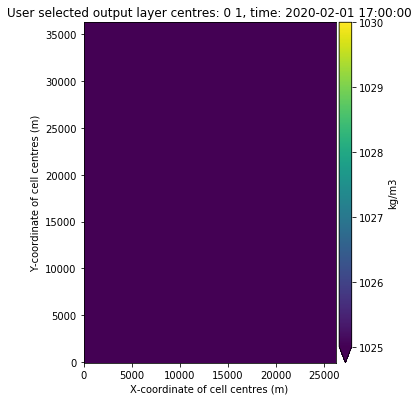

In [13]:
density_plot = hv_density.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
    .opts(opts.QuadMesh(cmap='viridis', \
                        show_grid=False,
                        clabel=combined.RHO.attrs['units'],
                        clim=(1025, 1030),
#                         width=444, height=600,
                        colorbar=True,
                        fig_inches=(5, 8), # only for mpl backend                        
                        aspect=0.74
                       )\
         )

# datashade() # datashaded for performance but that doens't work like everything in this thesis
density_plot

# Animations

## Density

In [ ]:
density_selection = combined.RHO.isel(time=slice(0, -1), KMAXOUT_RESTR=78)
density_selection

In [ ]:
hv_dens_animate_set = hv.Dataset(density_selection)
# rasterize() opts
density_animation = hv_dens_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', cmap='viridis', fig_inches=(5.5, 12), clim=(1025,1035), colorbar=True, aspect=0.3)

density_animation

hv.output(density_animation, holomap='mp4', fps=5)

## Velocity

In [ ]:
velocity_selection = combined.velocity.isel(time=slice(0, -1), KMAXOUT_RESTR=79)
# velocity_selection

In [ ]:
hv_velo_animate_set = hv.Dataset(velocity_selection)
velocity_animation = hv_velo_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), cmap='inferno', clim=(0,2.5), colorbar=True, aspect=0.75)
velocity_animation

hv.output(velocity_animation, holomap='mp4', fps=5)

## Concentration Sand

In [ ]:
combined.NAMCON.isel(LSTSCI=0).values

In [ ]:
combined.R1

In [ ]:
# hv_concentration = hv.Dataset(combined.R1.isel(LSTSCI=0))
concentration_selection = combined.R1.isel(time=slice(0, -1), LSTSCI=0, KMAXOUT_RESTR=79)

In [ ]:
combined.R1.isel(LSTSCI=0, KMAXOUT_RESTR=79).max()

In [ ]:
hv_conc_animate_set = hv.Dataset(concentration_selection)
concentration_animation = hv_conc_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), cmap='cividis', clim=(0,3.75), colorbar=True, aspect=0.3)
concentration_animation

hv.output(concentration_animation, holomap='mp4', fps=10)

In [ ]:
combined.LYRFRAC

In [ ]:
# hv_concentration = hv.Dataset(combined.R1.isel(LSTSCI=0))
underlayer_vol_frac_selection = combined.LYRFRAC.isel(time=slice(0, -1, 3), LSEDTOT=0, nlyr=75)

In [ ]:
hv_underlayer_vol_frac_set = hv.Dataset(underlayer_vol_frac_selection)

In [ ]:
underlayer_vol_frac_animation = hv_underlayer_vol_frac_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), clim=(0.3,0.55), cmap='cividis',  colorbar=True, aspect=0.3)
underlayer_vol_frac_animation 

hv.output(underlayer_vol_frac_animation, holomap='mp4', fps=10)

## Suspended sand load animation

In [ ]:
susp_sand_selection = combined['susp_load_sand'].isel(time=slice(0, -1, 5))

In [ ]:
hv_susp_sand_set = hv.Dataset(susp_sand_selection)
susp_sand_animation = hv_susp_sand_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), clim=(0,0.2), cmap='plasma', colorbar=True, aspect=0.3) 
susp_sand_animation

hv.output(susp_sand_animation, holomap='mp4', fps=7)

### Suspended silt load animation

In [ ]:
susp_silt_selection = combined['susp_load_silt'].isel(time=slice(0, -1, 5))

In [ ]:
hv_susp_silt_set = hv.Dataset(susp_silt_selection)
susp_silt_animation = hv_susp_silt_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12),  cmap='plasma', clim=(0,0.2), colorbar=True, aspect=0.3)  
susp_silt_animation

hv.output(susp_silt_animation, holomap='mp4', fps=7)

## Bottom depth

In [ ]:
bottom_depth_selection = combined['acc_sediment'].isel(time=slice(0, -1, 3))
bottom_depth_selection

In [ ]:
hv_bottom_depth_animate_set = hv.Dataset(bottom_depth_selection)
bottom_depth_animation = hv_bottom_depth_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12),
             clim=(-0.75,0.75), cmap='PiYG',\
             colorbar=True, aspect=0.3)
bottom_depth_animation

hv.output(bottom_depth_animation, holomap='mp4', fps=10)

## Deposits through channel line plot

In [ ]:
deposits_through_selection = combined['acc_sediment'].isel(M=31, time=slice(0, -1, 5))
deposits_through_selection

In [ ]:
# hv.help(hv.Curve)

In [ ]:
deposits_through_selection.hvplot.line('YZ', 'acc_sediment', height=200, aspect=3)

In [ ]:
hv_deposits_through_selection_set = hv.Dataset(deposits_through_selection)
hv_deposits_through_selection_set #,

In [ ]:
# deposits_through_selection_animation = hv_deposits_through_selection_set.to(hv.QuadMesh, ['time', 'YZ'])\
#     .options('QuadMesh', fig_inches=(5, 2),  ) #clim=(-2,0.5),
# deposits_through_selection_animation

# # hv.output(deposits_through_selection_animation, holomap='mp4', fps=5)

# Bottom stress

In [ ]:
bottom_stress_selection = combined['bottom_stress'].isel(time=slice(0, -1, 10))
print(bottom_stress_selection.isel(time=20).dims)
print(bottom_stress_selection.isel(time=20).shape)

In [ ]:
hv_bottom_stress_animate_set = hv.Dataset(bottom_stress_selection)
bottom_stress_animation = hv_bottom_stress_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', fig_inches=(5.5, 12), clim=(0,20),\
             cmap='Viridis', colorbar=True, aspect=0.3)
bottom_stress_animation

hv.output(bottom_stress_animation, holomap='mp4', fps=5)